# Importing Libraries and Explore Dataset

In [1]:
# importing library 
import numpy as np
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # data visualization
import seaborn           as sns                         # enhanced data viz
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.linear_model import LogisticRegression     # logistic regression
import statsmodels.formula.api as smf                   # logistic regression
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.neighbors import KNeighborsClassifier      # KNN for classification
from sklearn.neighbors import KNeighborsRegressor       # KNN for regression
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.tree import plot_tree                      # tree plots
from sklearn.metrics import confusion_matrix            # confusion matrix
# CART model packages
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import plot_tree                      # tree plots
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
file = './H_Retail_Complete_Trial.csv'


# reading the file into Python
retailk = pd.read_csv(file)



got = pd.read_excel(io = file,
                    header = 0,
                    sheet_name = 0)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# checking data set
retail.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


# User-Defined Function

In [2]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    
    
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

# Data Prep

In [3]:
# loading data dictionary

# pulling up data dictionary
got_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [4]:
# checking each feature for missing values
got.isnull().sum(axis =0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# flagging missing values

# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age'], dtype='object')

## Name

In [6]:
# calling text_split_feature
text_split_feature(col = 'name',
                   df  = got)


# checking results
got['number_of_names'].value_counts(normalize = False,
                                    sort = False,
                                    ascending = False).sort_index()

1     560
2    1128
3      92
4       9
5      35
6      12
Name: number_of_names, dtype: int64

## Title

In [7]:
# exploring title
got['title'].value_counts()

Ser                                                            365
Maester                                                         37
Archmaester                                                     21
Lord                                                            19
Winterfell                                                      17
Septon                                                          17
Lady                                                            12
Princess                                                        12
Septa                                                           10
Lord Commander of the Night's Watch                              9
King in the North                                                9
Grand Maester                                                    8
Prince                                                           8
Cupbearer                                                        8
Khal                                                          

In [8]:
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for king/ queen
    if got.loc[ index , 'title'] == 'King in the North' \
       or got.loc[ index , 'title'] == 'King-Beyond-the-Wall' \
       or got.loc[ index , 'title'] == 'King of Winter' \
       or got.loc[ index , 'title'] == 'King of Astapor' \
       or got.loc[ index , 'title'] == 'King of the Iron Islands' \
       or got.loc[ index , 'title'] == 'King of the Andals'\
       or got.loc[ index , 'title'] == 'PrincessQueen' \
       or got.loc[ index , 'title'] == 'QueenDowager Queen' \
       or got.loc[ index , 'title'] == 'PrincessQueenDowager Queen' \
       or got.loc[ index , 'title'] == 'LadyQueenDowager Queen'\
       or got.loc[ index , 'title'] == 'QueenBlack Bride'\
       or got.loc[ index , 'title'] == 'LadyQueen'\
       or got.loc[ index , 'name'] == 'Daenerys Targaryen'\
       or got.loc[ index , 'title'] == 'Light of the West'\
       or got.loc[ index , 'title'] == 'Iron Islands'\
       or got.loc[ index , 'title'] == 'Queen'\
       or got.loc[ index , 'title'] == 'King':
        got.loc[index, 'title'] = 'King_Queen'
        
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for prince/ princess
    if got.loc[ index , 'title'] == 'Princess' \
       or got.loc[ index , 'title'] == 'Prince' \
       or got.loc[ index , 'title'] == 'Prince of Dragonstone' \
       or got.loc[ index , 'title'] == 'Prince of Dorne'\
       or got.loc[ index , 'title'] == 'PrincessSepta'\
       or got.loc[ index , 'title'] == 'Prince of Winterfell'\
       or got.loc[ index , 'title'] == 'Red Flower Vale'\
       or got.loc[ index , 'title'] == 'Golden Storm'\
       or got.loc[ index , 'title'] == 'Sandship'\
       or got.loc[ index , 'title'] == 'Black Wind'\
       or got.loc[ index , 'title'] == 'Protector of the Realm':
        got.loc[index, 'title'] = 'Prince_Princess'
        
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for master
    if got.loc[ index , 'title'] == 'Good Master' \
       or got.loc[ index , 'title'] == 'Master of Coin' \
       or got.loc[ index , 'title'] == 'Master of Deepwood Motte' \
       or got.loc[ index , 'title'] == 'Master of Harlaw Hall'\
       or got.loc[ index , 'title'] == 'Master-at-Arms'\
       or got.loc[ index , 'title'] == 'master of ships'\
       or got.loc[ index , 'title'] == 'Master of coin'\
       or got.loc[ index , 'name'] == 'Plummer'\
       or got.loc[ index , 'title'] == 'Harridan Hill'\
       or got.loc[ index , 'title'] == 'Steward'\
       or got.loc[ index , 'title'] == 'Foamdrinker'\
       or got.loc[ index , 'title'] == 'Rain House'\
       or got.loc[ index , 'title'] == 'Tower of Glimmering'\
       or got.loc[ index , 'title'] == 'Horn Hill':
        got.loc[index, 'title'] = 'Master'


        
# cleaning title

# looping for title
for index, val in got.iterrows():
    
    # checking for maester
    if got.loc[ index , 'title'] == 'Archmaester' \
       or got.loc[ index , 'title'] == 'Grand Maester'\
       or got.loc[ index , 'title'] == 'Seneschal':
        got.loc[index, 'title'] = 'Maester'

# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for ser
    if got.loc[ index , 'title'] == 'Septon' \
       or got.loc[ index , 'title'] == 'Septa' \
       or got.loc[ index , 'title'] == 'High Septon':
        got.loc[index, 'title'] = 'Septon_Septa'
        
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for preist
    if got.loc[ index , 'title'] == 'Brother'\
       or got.loc[ index , 'title'] == 'Warlock'\
       or got.loc[ index , 'title'] == 'red hand'\
       or got.loc[ index , 'title'] == 'Ten Towers'\
       or got.loc[ index , 'title'] == 'Magnar of Thenn'\
       or got.loc[ index , 'title'] == 'Narbert'\
       or got.loc[ index , 'title'] == 'Goodman'\
       or got.loc[ index , 'title'] == 'Godswife'\
       or got.loc[ index , 'title'] == 'Warlock'\
       or got.loc[ index , 'title'] == 'First Builder'\
       or got.loc[ index , 'title'] == 'Goodwife'\
       or got.loc[ index , 'title'] == 'Undergaoler'\
       or got.loc[ index , 'title'] == 'BrotherProctor'\
       or got.loc[ index , 'title'] == 'Twins'\
       or got.loc[ index , 'title'] == 'Cupbearer'\
       or got.loc[ index , 'title'] == '[1]'\
       or got.loc[ index , 'title'] == 'Bloodrider'\
       or got.loc[ index , 'title'] == 'KhalKo (formerly)'\
       or got.loc[ index , 'title'] == 'Khalakka'\
       or got.loc[ index , 'title'] == 'Khal'\
       or got.loc[ index , 'title'] == 'Magister of Pentos'\
       or got.loc[ index , 'title'] == 'Magister'\
       or got.loc[ index , 'title'] == 'Wisdom':
        got.loc[index, 'title'] = 'Other_Titles'
        
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for preist
    if got.loc[ index , 'title'] == 'Blue Grace'\
       or got.loc[ index , 'title'] == 'Green Grace'\
       or got.loc[ index , 'title'] == 'Sunspear'\
       or got.loc[ index , 'title'] == 'Red Priest':
        got.loc[index, 'title'] = 'Priest'

# cleaning title

# looping for title
for index, val in got.iterrows():
    
    # checking for ser
    if got.loc[ index , 'name'] == 'Daemon II Blackfyre'\
       or got.loc[ index , 'title'] == 'Captain-General'\
       or got.loc[ index , 'title'] == 'Sunspear'\
       or got.loc[ index , 'title'] == 'Red Jester'\
       or got.loc[ index , 'title'] == 'Cobblecat'\
       or got.loc[ index , 'title'] == 'Big BucketThe Wull'\
       or got.loc[ index , 'title'] == 'Castellan'\
       or got.loc[ index , 'title'] == 'Captain'\
       or got.loc[ index , 'title'] == 'Tradesman-Captain'\
       or got.loc[ index , 'title'] == 'CastellanCommander'\
       or got.loc[ index , 'title'] == 'Commander of the City Watch'\
       or got.loc[ index , 'title'] == 'Knight'\
       or got.loc[ index , 'title'] == 'Captain of the guard'\
       or got.loc[ index , 'title'] == 'Commander of the Second Sons'\
       or got.loc[ index , 'title'] == 'Castellan of Harrenhal'\
       or got.loc[ index , 'title'] == 'Sealord'\
       or got.loc[ index , 'title'] == 'Serthe Knight of Saltpans'\
       or got.loc[ index , 'title'] == 'Chief Undergaoler'\
       or got.loc[ index , 'title'] == 'Wraith'\
       or got.loc[ index , 'title'] == 'Wind Witch'\
       or got.loc[ index , 'title'] == 'First Sword of Braavos'\
       or got.loc[ index , 'title'] == 'Eastwatch-by-the-Sea'\
       or got.loc[ index , 'title'] == 'Oarmaster'\
       or got.loc[ index , 'title'] == 'First Ranger'\
       or got.loc[ index , 'title'] == 'Ser':
        got.loc[index, 'title'] = 'Captain_Force'
        
# cleaning title 

# looping for title
for index, val in got.iterrows():
    
    # checking for lord
    if got.loc[ index , 'title'] == 'Lord Commander of the Night\'s Watch' \
       or got.loc[ index , 'title'] == 'Winterfell' \
       or got.loc[ index , 'title'] == 'Lord of the Tides' \
       or got.loc[ index , 'title'] == 'Lord Paramount of the Mander' \
       or got.loc[ index , 'title'] == 'Lord of Harrenhal' \
       or got.loc[ index , 'title'] == 'Lord Paramount of the Trident' \
       or got.loc[ index , 'title'] == 'Lord Reaper of Pyke' \
       or got.loc[ index , 'title'] == 'Lordsport' \
       or got.loc[ index , 'title'] == 'Lord of Southshield' \
       or got.loc[ index , 'title'] == 'Lord of Starfall' \
       or got.loc[ index , 'title'] == 'Lord of Coldmoat' \
       or got.loc[ index , 'title'] == 'Lord of Kingsgrave' \
       or got.loc[ index , 'title'] == 'Lord of Crows Nest' \
       or got.loc[ index , 'title'] == 'Lord of Hellholt' \
       or got.loc[ index , 'title'] == 'Lord of Atranta' \
       or got.loc[ index , 'title'] == 'Lord of Darry' \
       or got.loc[ index , 'title'] == 'Lord of Flint\'s Finger' \
       or got.loc[ index , 'title'] == 'Lord of the Deep Den' \
       or got.loc[ index , 'title'] == 'Lord Seneschal' \
       or got.loc[ index , 'title'] == 'Lord Steward' \
       or got.loc[ index , 'title'] == 'Lord of Blackhaven' \
       or got.loc[ index , 'title'] == 'Lord of the Seven Kingdoms' \
       or got.loc[ index , 'title'] == 'Lord Paramount of the Stormlands' \
       or got.loc[ index , 'title'] == 'Lord of the Snakewood' \
       or got.loc[ index , 'title'] == 'Lord of Pebbleton' \
       or got.loc[ index , 'title'] == 'Lord of Dragonstone' \
       or got.loc[ index , 'title'] == 'Lord of Iron Holt' \
       or got.loc[ index , 'title'] == 'Lord of the Hornwood' \
       or got.loc[ index , 'title'] == 'Lord of Oldcastle' \
       or got.loc[ index , 'title'] == 'Lord of Oakenshield' \
       or got.loc[ index , 'title'] == 'Lord of the Red Dunes' \
       or got.loc[ index , 'title'] == 'Lord of Sunflower Hall' \
       or got.loc[ index , 'title'] == 'Lord of Greyshield' \
       or got.loc[ index , 'title'] == 'Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw' \
       or got.loc[ index , 'title'] == 'Lord of the Tor' \
       or got.loc[ index , 'title'] == 'Lord of Hammerhorn' \
       or got.loc[ index , 'title'] == 'LordWisdom' \
       or got.loc[ index , 'title'] == 'Lord Steward of the Iron Islands' \
       or got.loc[ index , 'title'] == 'Lord of Honeyholt' \
       or got.loc[ index , 'title'] == 'Lord of the Iron Islands' \
       or got.loc[ index , 'title'] == 'Lord of the Marches'\
       or got.loc[ index , 'title'] == 'Lord of the Crossing'\
       or got.loc[ index , 'title'] == 'The LiddleLord Liddle'\
       or got.loc[ index , 'title'] == 'The NorreyLord Norrey'\
       or got.loc[ index , 'title'] == 'Hand of the King'\
       or got.loc[ index , 'title'] == 'Casterly Rock'\
       or got.loc[ index , 'title'] == 'Lady of Bear Island' \
       or got.loc[ index , 'title'] == 'Lady of the Leaves' \
       or got.loc[ index , 'title'] == 'Lady of Torrhen\'s Square' \
       or got.loc[ index , 'title'] == 'Lady of Darry' \
       or got.loc[ index , 'title'] == 'Lady of the Vale' \
       or got.loc[ index , 'title'] == 'Lady Marya'\
       or got.loc[ index , 'title'] == 'Harrenhal'\
       or got.loc[ index , 'title'] == 'Karl\'s Hold'\
       or got.loc[ index , 'title'] == 'Goldgrass'\
       or got.loc[ index , 'title'] == 'Grassy Vale'\
       or got.loc[ index , 'title'] == 'Castle Lychester'\
       or got.loc[ index , 'title'] == 'Sweetsister'\
       or got.loc[ index , 'title'] == 'Redfort'\
       or got.loc[ index , 'title'] == 'Grey Glen'\
       or got.loc[ index , 'title'] == 'Dragonstone'\
       or got.loc[ index , 'title'] == 'Claw Isle'\
       or got.loc[ index , 'title'] == 'Greenshield'\
       or got.loc[ index , 'title'] == 'Coldwater Burn'\
       or got.loc[ index , 'title'] == 'Heart\'s Home'\
       or got.loc[ index , 'title'] == 'Three Towers'\
       or got.loc[ index , 'title'] == 'Crakehall'\
       or got.loc[ index , 'title'] == 'Dyre Den'\
       or got.loc[ index , 'title'] == 'Baelor Blacktyde'\
       or got.loc[ index , 'title'] == 'Felwood'\
       or got.loc[ index , 'title'] == 'Gulltown'\
       or got.loc[ index , 'title'] == 'Oakenshield'\
       or got.loc[ index , 'title'] == 'Kayce'\
       or got.loc[ index , 'title'] == 'Vaith'\
       or got.loc[ index , 'title'] == 'Rills'\
       or got.loc[ index , 'title'] == 'Fair Isle'\
       or got.loc[ index , 'title'] == 'Runestone'\
       or got.loc[ index , 'title'] == 'Whitewalls'\
       or got.loc[ index , 'title'] == 'Strongsong'\
       or got.loc[ index , 'title'] == 'Longsister'\
       or got.loc[ index , 'title'] == 'Maidenpool'\
       or got.loc[ index , 'title'] == 'Hayford'\
       or got.loc[ index , 'title'] == 'Eyrie'\
       or got.loc[ index , 'title'] == 'Starpike'\
       or got.loc[ index , 'title'] == 'Duskendale'\
       or got.loc[ index , 'title'] == 'Coldmoat'\
       or got.loc[ index , 'title'] == 'Karhold'\
       or got.loc[ index , 'title'] == 'Bitterbridge'\
       or got.loc[ index , 'title'] == 'Last Hearth'\
       or got.loc[ index , 'title'] == 'Highgarden'\
       or got.loc[ index , 'name'] == 'Lord Ashford'\
       or got.loc[ index , 'title'] == 'Riverrun'\
       or got.loc[ index , 'title'] == 'Blackmont'\
       or got.loc[ index , 'title'] == 'Sealskin Point'\
       or got.loc[ index , 'title'] == 'Blackmont'\
       or got.loc[ index , 'title'] == 'Sharp Point'\
       or got.loc[ index , 'title'] == 'Volmark'\
       or got.loc[ index , 'title'] == 'Uplands'\
       or got.loc[ index , 'title'] == 'Sandstone'\
       or got.loc[ index , 'title'] == 'Darry'\
       or got.loc[ index , 'title'] == 'Greywater Watch'\
       or got.loc[ index , 'title'] == 'Wyndhall'\
       or got.loc[ index , 'title'] == 'Longbow Hall'\
       or got.loc[ index , 'title'] == 'Stone Hedge'\
       or got.loc[ index , 'title'] == 'Old Oak'\
       or got.loc[ index , 'title'] == 'Deepwood Motte'\
       or got.loc[ index , 'title'] == 'Ironoaks'\
       or got.loc[ index , 'title'] == 'Seven Kingdoms'\
       or got.loc[ index , 'title'] == 'Bear Island'\
       or got.loc[ index , 'title'] == 'Greenstone'\
       or got.loc[ index , 'title'] == 'Arbor'\
       or got.loc[ index , 'title'] == 'Hornvale'\
       or got.loc[ index , 'title'] == 'Nightsong'\
       or got.loc[ index , 'title'] == 'Goldengrove'\
       or got.loc[ index , 'title'] == 'Banefort'\
       or got.loc[ index , 'title'] == 'Sweetport Sound'\
       or got.loc[ index , 'title'] == 'Pinkmaiden'\
       or got.loc[ index , 'title'] == 'Skyreach'\
       or got.loc[ index , 'title'] == 'Shatterstone'\
       or got.loc[ index , 'title'] == 'Broad Arch'\
       or got.loc[ index , 'title'] == 'Ghost Hill'\
       or got.loc[ index , 'title'] == 'Feastfires'\
       or got.loc[ index , 'title'] == 'Lonely Light'\
       or got.loc[ index , 'title'] == 'Feastfires'\
       or got.loc[ index , 'title'] == 'Brightwater'\
       or got.loc[ index , 'title'] == 'Crag'\
       or got.loc[ index , 'title'] == 'Hornwood'\
       or got.loc[ index , 'title'] == 'Barrowton'\
       or got.loc[ index , 'title'] == 'Yronwood'\
       or got.loc[ index , 'title'] == 'Stonehelm'\
       or got.loc[ index , 'title'] == 'Seagard'\
       or got.loc[ index , 'title'] == 'Golden Tooth'\
       or got.loc[ index , 'title'] == 'Blackcrown'\
       or got.loc[ index , 'title'] == 'Acorn Hall'\
       or got.loc[ index , 'title'] == 'Stokeworth'\
       or got.loc[ index , 'title'] == 'Storm\'s End'\
       or got.loc[ index , 'title'] == 'Hightower'\
       or got.loc[ index , 'title'] == 'Cerwyn'\
       or got.loc[ index , 'title'] == 'Godsgrace'\
       or got.loc[ index , 'title'] == 'Knight of Griffin\'s Roost'\
       or got.loc[ index , 'title'] == 'Blacktyde'\
       or got.loc[ index , 'title'] == 'Salt Shore'\
       or got.loc[ index , 'title'] == 'High Steward of Highgarden'\
       or got.loc[ index , 'title'] == 'Keeper of the Gates of the Moon'\
       or got.loc[ index , 'title'] == 'Rook\'s Rest'\
       or got.loc[ index , 'title'] == 'Three Sisters'\
       or got.loc[ index , 'title'] == 'Widow\'s Watch'\
       or got.loc[ index , 'title'] == 'Mistress of whisperers'\
       or got.loc[ index , 'title'] == 'Lady'\
       or got.loc[ index , 'title'] == 'Lord':
        got.loc[index, 'title'] = 'Lord_Lady'


In [9]:
# checking observations 

print(f"""
Titles
----------------------------
{got.loc[:,'title'].value_counts(normalize = False,
                                 sort = True,
                                 ascending = False)}

""")


Titles
----------------------------
Captain_Force      396
Lord_Lady          254
Maester             67
Other_Titles        46
King_Queen          34
Prince_Princess     34
Septon_Septa        28
Master              17
Priest               4
Name: title, dtype: int64




## House

In [10]:
# checking for house
got['house'].value_counts(normalize=False, 
                          sort=False, 
                          ascending=False)

R'hllor                                      2
Good Masters                                 2
Happy Port                                   4
Iron Bank of Braavos                         1
Second Sons                                  5
House Reed                                   3
House Dayne of High Hermitage                1
House Martell                               23
House Santagar                               3
House Uller                                  3
House Allyrion                               2
Brave Companions                             9
House Blackmont                              3
House Dalt                                   2
House Dayne                                  6
House Drinkwater                             1
House Gargalen                               1
House Jordayne                               2
House Toland                                 1
House Vaith                                  2
House Wells                                  2
House Fowler 

In [11]:
# impute null value with 
got['house'] = got['house'].fillna(-0)

# rechecking for missing value
got['house'].isnull().sum()

0

In [12]:
# checking observations
print(f"""
Houses
---------------------------------
{got.loc[:,'house'].value_counts(normalize = False,
                                     sort = True,
                                     ascending = False)}

""")


Houses
---------------------------------
0                                          414
Night's Watch                              101
House Frey                                  95
House Stark                                 70
House Targaryen                             58
House Lannister                             45
House Greyjoy                               37
House Tyrell                                33
House Martell                               23
House Osgrey                                21
Faith of the Seven                          16
House Hightower                             16
House Arryn                                 15
House Bracken                               14
House Botley                                13
House Baratheon                             12
House Florent                               12
House Tully                                 12
House Velaryon                              11
House Whent                                 11
House Bolton      

## Culture

In [13]:
got['culture'].value_counts()

Northmen                   118
Ironborn                   105
Free Folk                   50
Valyrian                    43
Braavosi                    41
Dornish                     21
Ghiscari                    21
Dothraki                    21
Valemen                     16
Rivermen                    16
Reach                       15
Vale mountain clans         14
Westeros                    12
Dornishmen                  11
Free folk                   10
Westerman                    9
northmen                     9
Tyroshi                      7
Stormlands                   6
Qartheen                     5
Northern mountain clans      5
Ironmen                      4
Westermen                    4
Astapori                     4
Summer Isles                 4
First Men                    3
Lysene                       3
Meereenese                   3
Crannogmen                   3
Pentoshi                     3
Lhazareen                    2
Riverlands                   2
Wildling

In [14]:
# cleaning unclean value in culture column
for index, val in got.iterrows():
    
    # checking for Andal
    if got.loc[ index , 'culture'] == 'Andal':
        got.loc[index, 'culture'] = 'Andals'
        
for index, val in got.iterrows():
    
    # checking for Astapori
    if got.loc[ index , 'culture'] == 'Astapori':
        got.loc[index, 'culture'] = 'Astapor'

for index, val in got.iterrows():
    
    # checking for Braavosi
    if got.loc[ index , 'culture'] == 'Braavosi':
        got.loc[index, 'culture'] = 'Braavos'
        
for index, val in got.iterrows():
    
    # checking for Dornish
    if got.loc[ index , 'culture'] == 'Dornish' or got.loc[ index , 'culture'] == 'Dornishmen':
        got.loc[index, 'culture'] = 'Dorne'
        
for index, val in got.iterrows():
    
    # checking for Free Folk
    if got.loc[ index , 'culture'] == 'Free folk' or got.loc[ index , 'culture'] == 'free folk':
        got.loc[index, 'culture'] = 'Free Folk'
        
for index, val in got.iterrows():
    
    # checking for Ghiscaricari
    if got.loc[ index , 'culture'] == 'Ghiscaricari':
        got.loc[index, 'culture'] = 'Ghiscari'

for index, val in got.iterrows():
    
    # checking for ironborn
    if got.loc[ index , 'culture'] == 'ironborn' or got.loc[ index , 'culture'] == 'Ironmen':
        got.loc[index, 'culture'] = 'Ironborn'
        
for index, val in got.iterrows():
    
    # checking for Lyseni
    if got.loc[ index , 'culture'] == 'Lyseni':
        got.loc[index, 'culture'] = 'Lysene'

for index, val in got.iterrows():
    
    # checking for Meereenese
    if got.loc[ index , 'culture'] == 'Meereenese':
        got.loc[index, 'culture'] = 'Northmen'

for index, val in got.iterrows():
    
    # checking for northmen
    if got.loc[ index , 'culture'] == 'northmen':
        got.loc[index, 'culture'] = 'Ironborn'
        
for index, val in got.iterrows():
    
    # checking for Qartheen
    if got.loc[ index , 'culture'] == 'Qartheen':
        got.loc[index, 'culture'] = 'Qarth'

for index, val in got.iterrows():
    
    # checking for Meereenese
    if got.loc[ index , 'culture'] == 'Summer Islander' or got.loc[ index , 'culture'] == 'Summer Islands':
        got.loc[index, 'culture'] = 'Northmen'

for index, val in got.iterrows():
    
    # checking for Valemen
    if got.loc[ index , 'culture'] == 'Valemen':
        got.loc[index, 'culture'] = 'Vale'

for index, val in got.iterrows():
    
    # checking for Westermen
    if got.loc[ index , 'culture'] == 'Westermen' or got.loc[ index , 'culture'] == 'westermen' or got.loc[ index , 'culture'] == 'Westerlands':
        got.loc[index, 'culture'] = 'Westerman'

for index, val in got.iterrows():
    
    # checking for Wildling
    if got.loc[ index , 'culture'] == 'Vale mountain clans' or got.loc[ index , 'culture'] == 'Wildlings':
        got.loc[index, 'culture'] = 'Wildling'

for index, val in got.iterrows():
    
    # checking for Lhazarene
    if got.loc[ index , 'culture'] == 'Lhazarene':
        got.loc[index, 'culture'] = 'Lhazareen'

for index, val in got.iterrows():
    
    # checking for Norvoshi
    if got.loc[ index , 'culture'] == 'Norvoshi':
        got.loc[index, 'culture'] = 'Lhazareen'
        
for index, val in got.iterrows():
    
    # checking for Rivermen
    if got.loc[ index , 'culture'] == 'Rivermen':
        got.loc[index, 'culture'] = 'Riverlands'
        
for index, val in got.iterrows():
    
    # checking for Stormlands
    if got.loc[ index , 'culture'] == 'Stormlander':
        got.loc[index, 'culture'] = 'Stormlands'

In [15]:
# impute unknown for the missing value
got['culture'] = got['culture'].fillna(-0)

In [16]:
# checking observations
print(f"""
Culture
------------------------------
{got.loc[:,'culture'].value_counts(normalize = False,
                                    sort = True,
                                    ascending = False)}


""")


Culture
------------------------------
0                          1209
Northmen                    123
Ironborn                    119
Free Folk                    61
Valyrian                     43
Braavos                      42
Dorne                        34
Ghiscari                     22
Dothraki                     21
Riverlands                   18
Wildling                     18
Vale                         17
Westerman                    17
Reach                        15
Westeros                     12
Stormlands                    7
Tyroshi                       7
Qarth                         6
Northern mountain clans       5
Astapor                       5
Lysene                        4
Lhazareen                     4
Summer Isles                  4
Pentoshi                      3
First Men                     3
Crannogmen                    3
Qohor                         2
Andals                        2
Sistermen                     2
Asshai                        2


## Age

In [17]:
# checking mean of age
got.loc[ : , 'age'].mean()

-1368.041463414634

In [18]:
# finding negative age
got.loc[ : ,[  'age','name', 'title','male'  ]  ][got.loc[ : , 'age'] <0]

,age,name,title,male
443,-298001.0,Addam Velaryon,Captain_Force,1
748,-277980.0,Polliver,Captain_Force,1


In [19]:
# find average age
print(f"""
Average Age
-----------------------------------
Average female age : {got.loc[:,'age'][got.loc[:,'male'] == 0].mean()}
Average male age   : {got.loc[:,'age'][got.loc[:,'male'] == 1][got.loc[:,'age']>0].mean()}
""")


Average Age
-----------------------------------
Average female age : 37.69736842105263
Average male age   : 36.826771653543304



In [20]:
# creating for loop to clean age data (negative) - assume zero
for index, val in got.iterrows():
    
    # age negative
    if got.loc[ index , 'age'] < 0:
        got.loc[index, 'age'] = 0
        

In [21]:
# imputing missing values with unknown
got['age'] = got['age'].fillna(-1)

In [22]:
# imputing no age with average 

# male
for index, val in got.iterrows():
    
    # age 
    if got.loc[ index , 'age'] != -1\
       and got.loc[ index , 'male'] == 1:
        got.loc[index, 'age'] = 37

# female
for index, val in got.iterrows():
    
    # age 
    if got.loc[ index , 'age'] != -1\
       and got.loc[ index , 'male'] == 0:
        got.loc[index, 'age'] = 38

# rechecking null
got['age'].isnull().sum()

0

## Other Nulls Variables

In [23]:
# impute unknown for the missing value
got['title'] = got['title'].fillna(-0)
got['dateOfBirth'] = got['dateOfBirth'].fillna(-0)
got['mother'] = got['mother'].fillna(-0)
got['father'] = got['father'].fillna(-0)
got['heir'] = got['heir'].fillna('none')
got['spouse'] = got['spouse'].fillna(-0)
got['isAliveFather'] = got['isAliveFather'].fillna(-0)
got['isAliveMother'] = got['isAliveMother'].fillna(-0)
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(-0)
got['isAliveHeir'] = got['isAliveHeir'].fillna(-0)

## Finalized Data

In [24]:
# checking for nulls
got.isnull().sum(axis =0)

S.No                          0
name                          0
title                         0
male                          0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveFather                 0
isAliveMother                 0
isAliveSpouse                 0
isAliveHeir                   0
age                           0
popularity                    0
isAlive                       0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir                        0
m_house                       0
m_spouse                      0
m_isAliv

In [25]:
# dropping column 
got = got.drop(['dateOfBirth','S.No', 'mother', 'father', 'heir','spouse' ], axis = 1)

# checking the results
got.columns


Index(['name', 'title', 'male', 'culture', 'house', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'age', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveFather', 'm_isAliveMother', 'm_isAliveSpouse', 'm_isAliveHeir', 'm_age', 'number_of_names'], dtype='object')

# Checking Correlation

In [26]:
# correlation
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
m_dateOfBirth                 0.17
m_isAliveFather               0.14
m_mother                      0.14
m_isAliveMother               0.13
m_heir                        0.13
m_father                      0.13
m_isAliveSpouse               0.13
m_spouse                      0.06
m_isAliveHeir                 0.06
m_culture                     0.05
m_house                       0.05
m_title                       0.05
age                           0.03
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
isAliveHeir                  -0.02
m_age                        -0.03
isAliveMother                -0.04
isAliveSpouse                -0.08
book4_A_Feast_For_Crows      -0.08
number_of_names              -0.09
isAliveFather                -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

In [27]:
# stratify respond variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

# Random Forest

In [28]:
# declaring explanatory variables
got_data = got.drop(['isAlive', 'name', 'title', 'culture', 'house'], axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']


In [29]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data, # x-data
            got_target, # y data
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
# checking proportion
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [31]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [32]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8499
Testing  ACCURACY: 0.8098
AUC Score        : 0.6625


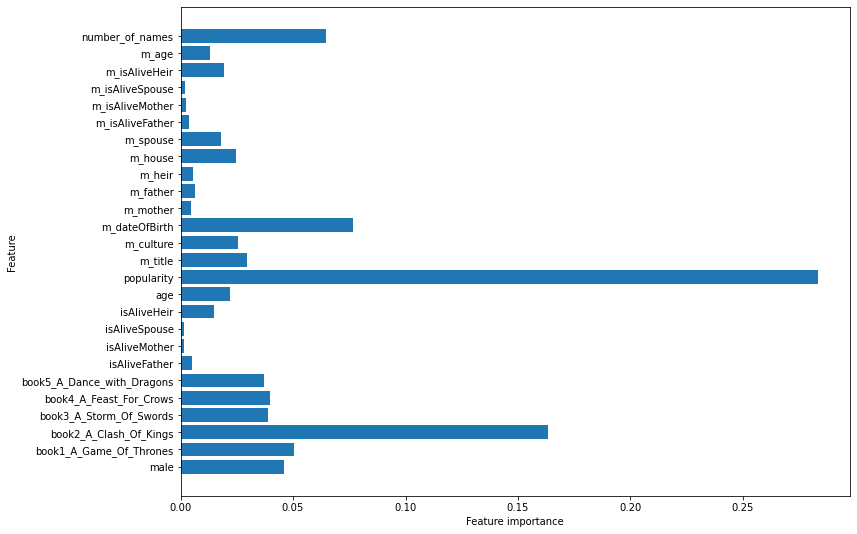

In [33]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                         train = x_train,
                         export = False)

In [34]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 2
True Positives : 132



# Hyperparameter Tuning

In [35]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}

# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 850, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.6488


In [43]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=850, random_state=219,
                       warm_start=True)

In [37]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion='entropy', 
                                      n_estimators=600,
                                      max_depth= 8,
                                      random_state=219,
                                      warm_start=True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8438
Forest Tuned Testing  ACCURACY: 0.8696
Forest Tuned AUC Score        : 0.76


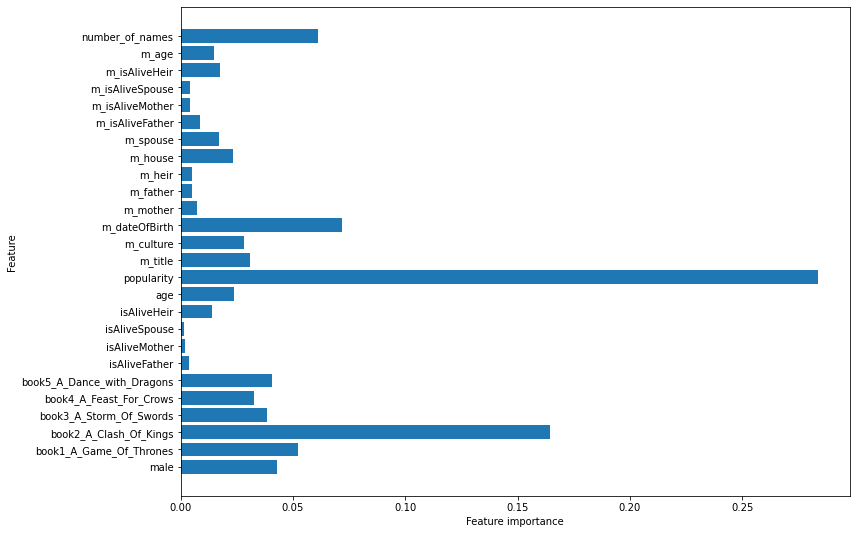

In [38]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [39]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = forest_tuned_pred))

[[ 26  24]
 [  0 134]]


In [40]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 0
True Positives : 134



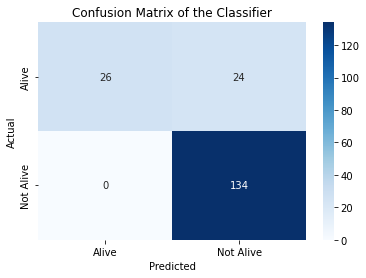

In [41]:
# calling the visual_cm function
got_cm = visual_cm(true_y = y_test,
          pred_y = forest_tuned_pred,
          labels = ['Alive', 'Not Alive'])

In [42]:
# print output
print(f""" 
Model Type
-----------------------------------------------------------
Random Forest Tree

Model Accuracy Score
-----------------------------------------------------------
Forest Tuned Training ACCURACY : {forest_tuned.score(x_train, y_train).round(4)}
Forest Tuned Testing  ACCURACY : {forest_tuned.score(x_test, y_test).round(4)}
Forest Tuned AUC Score         : {roc_auc_score(y_true  = y_test,
                                                y_score = forest_tuned_pred).round(4)}

Confusion Matrix
-----------------------------------------------------------
True Negatives                  : {tuned_rf_tn}
False Positives                 : {tuned_rf_fp}
False Negatives                 : {tuned_rf_fn}
True Positives                  : {tuned_rf_tp}

""")

 
Model Type
-----------------------------------------------------------
Random Forest Tree

Model Accuracy Score
-----------------------------------------------------------
Forest Tuned Training ACCURACY : 0.8438
Forest Tuned Testing  ACCURACY : 0.8696
Forest Tuned AUC Score         : 0.76

Confusion Matrix
-----------------------------------------------------------
True Negatives                  : 26
False Positives                 : 24
False Negatives                 : 0
True Positives                  : 134


